# QR iteration

### _Note: QR decomposition, Hessenberg transformation and shifting are implemented manually in this notebook (no packages are used)_

The QR iteration and Hessenberg transformation will be investigated on a simple matrix.

$$\begin{pmatrix} 5 & -2 & -5 & -1\\
                  1 & 0 & -3 & -2 \\
                  0 & 2 & 2  & -3 \\
                  0 & 0 & 1 & 2   \\
\end{pmatrix}$$

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math as m
import pandas as pd

## Creating the matrix

In [31]:
data = [5, -2, -5, -1, 1, 0, -3, -2, 0, 2, 2, -3, 0, 0, 1, 2]
dim = int(m.sqrt(len(data)))
mat = []
idx = 0
while idx < (dim*dim):
    row = []
    for i in range(dim):
        row.append(data[idx]+ 0.j)
        idx += 1
    mat.append(np.array(row))
mat = np.array(mat)
mat

array([[ 5.+0.j, -2.+0.j, -5.+0.j, -1.+0.j],
       [ 1.+0.j,  0.+0.j, -3.+0.j, -2.+0.j],
       [ 0.+0.j,  2.+0.j,  2.+0.j, -3.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  2.+0.j]])

## QR Iteration - Implementation

for **QR decomposition** <br>
$R = Q^T A$ <br>
where, $Q$ is an orthogonal matrix $({Q}^{T}Q = I)$ and $R$ is an upper triangular matrix. <br>
Assume that $A$ is: <br>
$$\begin{pmatrix}   {a_{11}} & {a_{12}} \\
                    {a_{21}} & {a_{22}} \\
\end{pmatrix}$$
<br>
a typical transpose is **2-D** is a rotation by $\theta$ <br>
$$\begin{pmatrix}   {\cos\theta} & {\sin\theta} \\
                    {-\sin\theta} & {\cos\theta} \\
\end{pmatrix}$$
<br>
By applying $R = {Q}^{T}A$ we get <br>
$-a_{11} \sin\theta + a_{21} \cos\theta = 0 \rightarrow a_{11} \sin\theta = a_{21} \cos\theta $ <br>
if $ a_{11} \neq 0 \rightarrow \tan{\theta} = \frac{a_{21}}{a_{11}} $ <br>
if $ a_{11} = 0 \rightarrow \cos\theta = 0 $ <br> <br>

For larger matrices, we do this transformation using $S$ matrices, where <br>
$ {S}_1 = S_{2,1} . S_{3,1} ... S_{n,1} $ <br>
$ {S}_2 = S_{3,2} . S_{4,2} ... S_{n,2} $ <br>
. <br>
. <br>
. <br>
$ {S}_{n-1} = S_{n,n-1}$ <br>
weher, $S_{ij}$ means the $i^{th}$ element in the $j^{th}$ column will be zero in matrix **A**
<br> And <br>
${Q}^{T} = {S}_{n-1} . {S}_{n-2} ... {S}_2 . {S}_1 $ <br>

The $S_{ij}$ matrix which can make an element zero is sparse. Therefore it is represented by a special structure:

For every $S_{ij}$ matrix, let the angle be $\theta$ and $tan$ is $\tan{\theta}$ <br>
then, <br> ${\sec}^{2}{\theta} = 1 + {\tan}^{2}{\theta}$ $\rightarrow$ ${\sec\theta} = \sqrt{1 + {\tan}^{2}{\theta}}$ $\rightarrow$ $\frac{1}{\cos\theta} = \sqrt{1 + {tan}^{2}}$ <br> 
Hence, <br> ${\cos\theta} = \frac{1}{\sqrt{1 + {tan}^{2}}}$ <br>
<br>
Also, we know that <br> ${\sin\theta} = \sqrt{1 - {\cos}^{2}{\theta}}$ $\rightarrow$ ${\sin\theta} = \sqrt{1 - \frac{1}{1 + {tan}^{2}}}$ <br>
Hence, <br> ${\sin\theta} = \frac{tan}{\sqrt{1 + {tan}^{2}}}$ <br> <br>
When $\tan{\theta} = \infty$ $\rightarrow$ $\rightarrow$ ${\sin\theta} = 1$ and ${\cos\theta} = 0$

In [32]:
class S:
    def __init__(self, i, j, tan = 0):
        self.i = i
        self.j = j
        self.sin = self.__to_sin(tan)
        self.cos = self.__to_cos(tan)
        
    def __to_sin(self, tan):
        return tan / m.sqrt(1.0 + tan * tan)
    
    def __to_cos(self, tan):
        return 1.0 / m.sqrt(1.0 + tan * tan)
    
    def infinity_tan(self):
        self.sin = 1.0
        self.cos = 0.0                                  

This multiplication should exhaust the fact that $S_{ij}$ is sparse.

let's assume that we want to make the fifth element of the first column to be zero $( a_{5,1} \rightarrow {\grave a}_{5,1} = 0)$ <br>
$S_{5,1}$ matrix looks like this: <br>
$$\begin{pmatrix}   \cos\theta_{n,1}&   &   &   &   &\sin\theta_{n,1}   \\
                    & 1 &   &   &   &   \\
                    &   & 1 &   &   &   \\
                    &   &   & 1 &   &   \\
                    &   &   &   & 1 &   \\
                    -\sin\theta_{n1}&   &   &   &   &\cos\theta_{n1}   \\
\end{pmatrix}$$
<br>
$ {\grave a}_{1,1} = {a}_{1,1} . \cos + {a}_{1,5} . \sin $ <br>
$ {\grave a}_{5,1} = {a}_{5,1} . \cos + {a}_{1,1} . \sin $ <br> <br>
Then, $S_{5,2}$ matrix looks like this: <br>
$$\begin{pmatrix}   \cos\theta_{n-1,1}&   &   &   &   &\sin\theta_{n-1,1}   \\
                    & 1 &   &   &   &   \\
                    &   & 1 &   &   &   \\
                    &   &   & 1 &   &   \\
                    -\sin\theta_{n-1,1}&   &   &   &   &\cos\theta_{n-1,1}   \\
                    &   &   &   &   &  1   \\
\end{pmatrix}$$
<br>etc...

In [33]:
def sij_dot_A(s_ij, A): # A should be a numpy matrix
    for idx in range(0, A.shape[1]):
        temp = A[s_ij.j, idx] * s_ij.cos + A[s_ij.i, idx] * s_ij.sin
        A[s_ij.i, idx] = A[s_ij.i, idx] * s_ij.cos - A[s_ij.j, idx] * s_ij.sin
        A[s_ij.j, idx] = temp

After eliminating all the zeros under the diagonal the transpose of $S's$ are applied from the right to get the new **A**.

In [34]:
def A_dot_transpose_sij(A, s_ij):
    for idx in range(0, A.shape[0]):
        temp = A[idx, s_ij.j] * s_ij.cos + A[idx, s_ij.i] * s_ij.sin
        A[idx, s_ij.i] = A[idx, s_ij.i] * s_ij.cos - A[idx, s_ij.j] * s_ij.sin
        A[idx, s_ij.j] = temp

The actual $S$ for the current state of the **A** at $i, j$:

In [35]:
def next_s(A, i, j, tolerance=1e-10):
    if abs(A[j, j]) < tolerance:
        s = S(i, j)
        s.infinity_tan()
        return s
    else:
        tan = A[i, j] / A[j, j]
        return S(i, j, tan)

The eigenvalues are given as the diagonal elements in the **A** after sufficient number of **QR** iteration. A function for accessing the diagonal elements:

In [36]:
def diagonals(A):
    eis = []
    for idx in range(0, A.shape[0]):
        eis.append(A[idx, idx])
        
    return eis

Then one step in the **QR** iteration ($A_{k+1} = Q^T \cdot A_{k} \cdot Q$) can be implemented in the following way:

In [37]:
def qr_one_step(A):
    s_list = []
    for j in range(0, A.shape[1]): # multiplications from left, erasing zeros in the j. column 
        for i in range(A.shape[0] - 1, j, -1):
            s_temp = next_s(A, i, j)
            sij_dot_A(s_temp, A)
            s_list.append(s_temp)
    for s in s_list: # multiplying from right, the order is good due to append
        A_dot_transpose_sij(A, s)

#### Claculate final eigenvalues

if value below diagonal is not close enough to zero, this means that there are conjugate complex eigenvalues, two conjugate complex eigenvalues will be held in a sub matrix $h_{n,n}, h_{n+1,n+1}, h_{n,n+1}, h_{n+1,n}$ of the size $2x2$. <br>


$$\begin{pmatrix}   &   &   &   &   &   &   \\
                    &   &   &   &   &   &   \\
                    &   &  {h_{n,n}} & {h_{n,n+1}} &   &   &   \\
                    &   &  {h_{n+1,n}} & {h_{n+1,n+1}} &   &   &   \\
                    &   &   &   &   &   &   \\
                    &   &   &   &   &   &   \\
                    &   &   &   &   &   &   \\
\end{pmatrix}$$


By comparing $h_{n+1,n}$ and $h_{n,n+1}$, if their absolute value is equal and their sign is opposite, we have the eigenvalues. <br>

$$\begin{pmatrix}   {Re} & {Im} \\
                    {Im} & {Re} \\
\end{pmatrix}$$

If not, we calculate the eigenvalues of the $2x2$ matrix $h_{n,n}, h_{n+1,n+1}, h_{n,n+1}, h_{n+1,n}$. <br>

$$\begin{pmatrix}   {h_{n,n}} & {h_{n,n+1}} \\
                    {h_{n+1,n}} & {h_{n+1,n+1}} \\
\end{pmatrix}$$

In [38]:
def calc2Eigenvalues(mat):
    eigen_vals = []
    a = 1
    b = -mat[0, 0] - mat[1, 1]
    c = mat[0, 0] * mat[1, 1] - mat[0, 1] * mat[1, 0]
    if ((b * b) >= (4.0 * a * c)):
        mat[0, 0] = (-b + m.sqrt((b * b) - (4.0 * a * c))) / 2.0 / a
        mat[1, 1] = (-b - m.sqrt((b * b) - (4.0 * a * c))) / 2.0 / a
        mat[1, 0] = 0.0
        mat[0, 1] = 0.0
        eigen_vals = diagonals(mat)
    else:
        mat[0, 0] = -b / 2.0 / a
        mat[1, 1] = mat[0, 0]
        mat[0, 1] = m.sqrt((4.0 * a * c) - (b * b)) / 2.0 / a
        mat[1, 0] = -mat[0, 1]
        eigen_vals = [complex(mat[0, 0], mat[0, 1]), complex(mat[1, 1], mat[1, 0])]
    return eigen_vals

In [39]:
def getAccEigenvalues(A):
    eig_vals = []
    i = 0
    while(i<(A.shape[0]-1)):
        if abs(A[i+1, i]) <= 1e-10:
            eig_vals.append(complex(A[i, i]))
        elif A[i+1, i] == -(A[i, i+1]):
            eig_vals.append(complex(A[i, i], A[i+1, i]))
            eig_vals.append(complex(A[i+1, i+1], A[i, i+1]))
            i+=1
        else:
            mat = A[i:i+2, i:i+2].copy()
            eig_vals += calc2Eigenvalues(mat)
            i+=1
        i+=1
    return eig_vals

Then the **QR** iteration is given as follows:

In [40]:
def qr(A, iter_num=1e6, error=1e-6, callback = None, shift = False): # shift: True shifting is applied
    
    # helper for calculating the error
    diag = diagonals(A)
    def sum_sq():
        loss = 0.0
        for x in diag:
            loss += x * x
        return loss
    
    ei_sum_0 = sum_sq()
    
    it = 0
    terminate = False
    while not terminate:       
        if shift:
            DeltaA = A[-1, -1] * np.identity(A.shape[0])
            A -= DeltaA
            qr_one_step(A)
            A += DeltaA
        else:
            qr_one_step(A)
        
        # error calculation and administration
        diag = getAccEigenvalues(A)
        ei_sum_1 = sum_sq()
        Err = ei_sum_1 - ei_sum_0
        
        if not (callback is None):
            callback(Err)
            
        ei_sum_0 = ei_sum_1
        it += 1
        if (abs(Err) <= error) or (it >= iter_num): terminate = True
    return diag

#### Extra documentation

matrix $S_{i1}$ will make item $A_{i1}$ ($i th$ row and $1st$ column) <br>
the form of $S_{i1}$ in this case will be: <br>

$$\begin{pmatrix} \cos(\theta_{i1}) &   &   & \sin(\theta_{i1}) &   &   &   \\
                    & 1 &   &   &   &   &   \\
                    &   & 1 &   &   &   &   \\
                    -\sin(\theta_{i1}) &   &   & \cos(\theta_{i1}) &   &   &   \\
                    &   &   &   & 1 &   &   \\
                    &   &   &   &   & . &   \\
                    &   &   &   &   &   & 1 \\
\end{pmatrix}$$

note that, for **QR decomposition** <br>
$R = Q^T A$ <br>
also,
$R = \left[ \prod_{i=1}^{n-1} \prod_{j=i+1}^{n} S_{ji} \right] A$ <br>
then,
$ Q^T  = \left[ \prod_{i=1}^{n-1} \prod_{j=i+1}^{n} S_{ji} \right] $ <br><br>
when the algorithm iterates <br>
at step $k+1$: $A_{k+1} = R_{k} \cdot {Q}_k$ <br>
but, $R_k = {Q^T}_k \cdot A_k$ <br>
then, $A_{k+1} = {Q^T}_k  A_k {Q}_k$ $\Rightarrow$ _backward transformation_<br><br>

algorithm work as the following:<br>
for each iteration $k$<br>
&emsp; for every column $j$ in $A_k$<br>
&emsp; &emsp; generate $ S_{ij}$ <br>
&emsp; &emsp; calculate $ S_{ij} A_k $<br>
&emsp; &emsp; save $S_{ij}$ in $S$ list <br>
&emsp; &emsp; the resulted $A$ at this point is $R$<br>
&emsp; &emsp; &emsp; to get next $A ( = A_{k+1})$ , we should multiply $R ( = A_k)$ by $S^T ( = {\left[ \prod_{i=1}^{n-1} \prod_{j=i+1}^{n} S_{ji} \right]}^T)$<br>
&emsp; &emsp; &emsp; backward transformation <br>

&emsp; for every $S_{ij}$ in $S$ list<br>
&emsp; &emsp; calculate $A_k {S_{ij}}^T$ <br>
&emsp; result is $A_{k+1}$ <br>

## Experiments with the given matrix (no Hessenberg )

The following subtasks will be investigated: <br>
QR iteration without Hessenberg (convergence speed, eigenvalues)
1. unbounded iteration, error tolerence of $10^{-2}$
2. unbounded iteration, error tolerence of $10^{-3}$
3. unbounded error, $50$ iterations
4. unbounded error, $200$ iterations
5. applying noise ($100$ iterations)

### Data dictionary

In [41]:
main_exps = ["E = 1e-2", "E = 1e-3", "It 50", "It 200", "High noise", "Med noise", "Low noise"]
sub_exps = ["err", "it"]
NoHess_results = dict()
for main_exp in main_exps:
    NoHess_results[main_exp] = {}
    for sub_exp in sub_exps:
        NoHess_results[main_exp].update({sub_exp: {}})
print(NoHess_results)

{'E = 1e-2': {'err': {}, 'it': {}}, 'E = 1e-3': {'err': {}, 'it': {}}, 'It 50': {'err': {}, 'it': {}}, 'It 200': {'err': {}, 'it': {}}, 'High noise': {'err': {}, 'it': {}}, 'Med noise': {'err': {}, 'it': {}}, 'Low noise': {'err': {}, 'it': {}}}


### Eigen values by Numpy package

In [42]:
qr_mtx = np.copy(mat)
ref_solution = np.linalg.eig(qr_mtx)[0]
print("Reference solution:")
for E in ref_solution:
    print(E)

Reference solution:
(4.2097461532535965+8.881784197001252e-16j)
(2.036130104533675+2.786496827896783j)
(0.7179936376790566-3.718886770256047e-17j)
(2.0361301045336764-2.7864968278967845j)


In [43]:
# Functions which will be used in the following tasks

history = { "it": [], "err": []}
def monitor_error(error):
    history["err"].append(error)
    history["it"].append(len(history["it"]) + 1)
    
def show_graph(title):
    plt.plot(history["it"], history["err"])

    plt.xlabel('iteration')
    plt.ylabel('error')
    plt.title(title)
    plt.show()

def clear_history():
    history["it"].clear()
    history["err"].clear()

#### QR without Hessenberg (error = $10^{-2}$)

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alsh

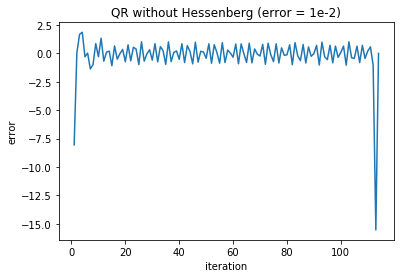

Error = (6.921574424723076e-10+0j) after 114 iterations
QR solution: [(4.209746153365084+0j), (2.0361301044779463+2.78649682788658j), (2.0361301044779463-2.78649682788658j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [44]:
shift = 'no shift'
exp_name = 'E = 1e-2'
qr_mtx = np.copy(mat)

error = 1e-2
e_vals = qr(qr_mtx, error=error, callback = monitor_error)

show_graph("QR without Hessenberg (error = 1e-2)")
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

NoHess_results[exp_name]['err'][shift] = history["err"][-1].real
NoHess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alsh

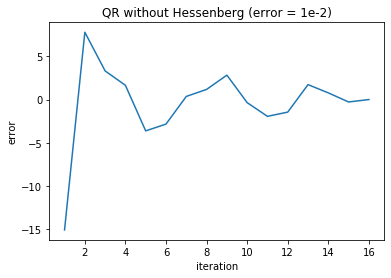

Error = (-0.00033878722587843413+0j) after 16 iterations
QR solution: [(4.310296081836101+0j), (1.483951027536694+0j), (2.4877592529481474+0j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [45]:
shift = 'shift'
exp_name = 'E = 1e-2'
qr_mtx = np.copy(mat)

error = 1e-2
e_vals = qr(qr_mtx, error=error, callback = monitor_error, shift=True)

show_graph("QR without Hessenberg (error = 1e-2)")
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

NoHess_results[exp_name]['err'][shift] = history["err"][-1].real
NoHess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

#### QR without Hessenberg (error = $10^{-3}$)

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alsh

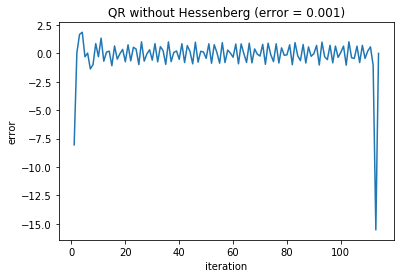

Error = (6.921574424723076e-10+0j) after 114 iterations
QR solution: [(4.209746153365084+0j), (2.0361301044779463+2.78649682788658j), (2.0361301044779463-2.78649682788658j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [46]:
shift = 'no shift'
exp_name = 'E = 1e-3'
qr_mtx = np.copy(mat)

error = 1e-3
e_vals = qr(qr_mtx, error=error, callback = monitor_error)

show_graph(f'QR without Hessenberg (error = {error})')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

NoHess_results[exp_name]['err'][shift] = history["err"][-1].real
NoHess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alsh

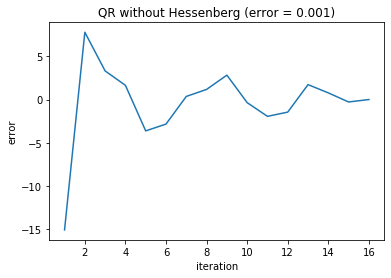

Error = (-0.00033878722587843413+0j) after 16 iterations
QR solution: [(4.310296081836101+0j), (1.483951027536694+0j), (2.4877592529481474+0j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [47]:
shift = 'shift'
exp_name = 'E = 1e-3'
qr_mtx = np.copy(mat)

error = 1e-3
e_vals = qr(qr_mtx, error=error, callback = monitor_error, shift=True)

show_graph(f'QR without Hessenberg (error = {error})')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

NoHess_results[exp_name]['err'][shift] = history["err"][-1].real
NoHess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

#### QR without Hessenberg (iterations = $50$)

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alsh

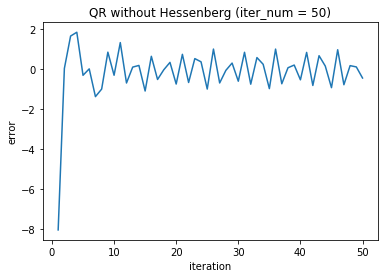

Error = (-0.43618855988157534+0j) after 50 iterations
QR solution: [(4.209730855965902+0j), (1.8037179830485532+0j), (2.2685575233065034+0j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [48]:
shift = 'no shift'
exp_name = 'It 50'
qr_mtx = np.copy(mat)

iter_num = 50
e_vals = qr(qr_mtx, iter_num=iter_num, callback = monitor_error)

show_graph(f'QR without Hessenberg (iter_num = {iter_num})')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

NoHess_results[exp_name]['err'][shift] = history["err"][-1].real
NoHess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alsh

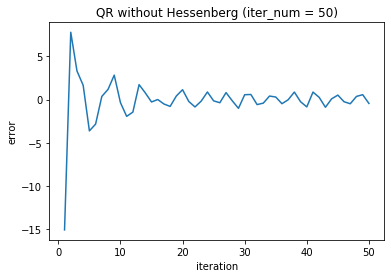

Error = (-0.45290442155897637+0j) after 50 iterations
QR solution: [(4.208606944846716+0j), (2.5276697650393682+0j), (1.5457296524348632+0j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [49]:
shift = 'shift'
exp_name = 'It 50'
qr_mtx = np.copy(mat)

iter_num = 50
e_vals = qr(qr_mtx, iter_num=iter_num, callback = monitor_error, shift=True)

show_graph(f'QR without Hessenberg (iter_num = {iter_num})')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

NoHess_results[exp_name]['err'][shift] = history["err"][-1].real
NoHess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

#### QR without Hessenberg (iterations = $200$)

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alsh

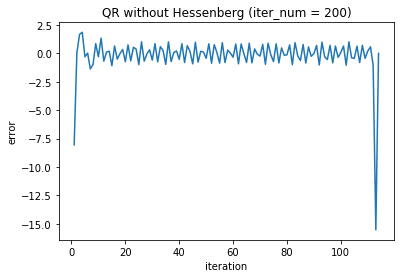

Error = (6.921574424723076e-10+0j) after 114 iterations
QR solution: [(4.209746153365084+0j), (2.0361301044779463+2.78649682788658j), (2.0361301044779463-2.78649682788658j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [50]:
shift = 'no shift'
exp_name = 'It 200'
qr_mtx = np.copy(mat)

iter_num = 200
e_vals = qr(qr_mtx, iter_num=iter_num, callback = monitor_error)

show_graph(f'QR without Hessenberg (iter_num = {iter_num})')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

NoHess_results[exp_name]['err'][shift] = history["err"][-1].real
NoHess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alsh

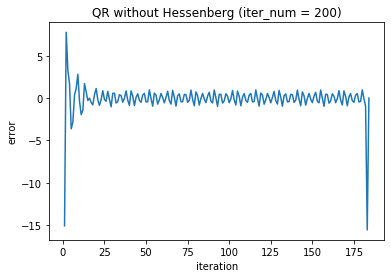

Error = (6.563567467310349e-10+0j) after 184 iterations
QR solution: [(4.209746153350182+0j), (2.03613010448542+2.7864968278616593j), (2.03613010448542-2.7864968278616593j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [51]:
shift = 'shift'
exp_name = 'It 200'
qr_mtx = np.copy(mat)

iter_num = 200
e_vals = qr(qr_mtx, iter_num=iter_num, callback = monitor_error, shift=True)

show_graph(f'QR without Hessenberg (iter_num = {iter_num})')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

NoHess_results[exp_name]['err'][shift] = history["err"][-1].real
NoHess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

#### Applying noise

In [52]:
np.random.seed(14)
def noise(sigma): # standard normal distribution in the background
    return np.random.randn(4, 4)/sigma

# examples
qr_mtx = np.copy(mat)
qr_noise1 = qr_mtx + noise(1) # medium noise
qr_noise2 = qr_mtx + noise(0.1) # high noise
qr_noise3 = qr_mtx + noise(10) # small noise

print("Original: \n", qr_mtx)
print("Noise 1: \n", qr_noise1)
print("Noise 2: \n", qr_noise2)
print("Noise 3: \n", qr_noise3)

Original: 
 [[ 5.+0.j -2.+0.j -5.+0.j -1.+0.j]
 [ 1.+0.j  0.+0.j -3.+0.j -2.+0.j]
 [ 0.+0.j  2.+0.j  2.+0.j -3.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  2.+0.j]]
Noise 1: 
 [[ 6.55133911+0.j -1.92081398+0.j -4.82602347+0.j -1.07233657+0.j]
 [-1.0043294 +0.j  0.14467781+0.j -4.50116862+0.j -1.78889055+0.j]
 [-0.55820506+0.j  3.08452906+0.j  1.81371088+0.j -2.98533863+0.j]
 [-1.07556947+0.j  0.64225207+0.j  0.81966329+0.j  2.62030025+0.j]]
Noise 2: 
 [[ 13.10974335+0.j   5.77935866+0.j  -7.37489678+0.j -19.91912345+0.j]
 [-10.72121794+0.j   8.36206971+0.j   7.092734  +0.j  10.93099361+0.j]
 [ -5.49331166+0.j  -7.81712865+0.j  11.14672758+0.j   5.73070378+0.j]
 [  0.22111142+0.j  -0.04143584+0.j -12.49126151+0.j  -0.08217846+0.j]]
Noise 3: 
 [[ 5.13265403+0.j -2.09162606+0.j -5.04700131+0.j -1.01494425+0.j]
 [ 0.96747399+0.j -0.18057235+0.j -3.05003702+0.j -2.05647806+0.j]
 [-0.03144286+0.j  1.96033228+0.j  2.00059331+0.j -3.09971382+0.j]
 [ 0.16910976+0.j -0.03164409+0.j  1.14651344+0.j  2.146360

##### First, low noise is applied. Results are similar like in the reference case.

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alsh

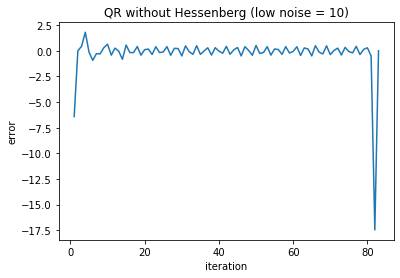

Error = (4.797104935505558e-10+0j) after 83 iterations
QR solution: [(4.636220808230415+0j), (1.9529372573830739+2.95427653721109j), (1.9529372573830739-2.95427653721109j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [53]:
shift = 'no shift'
exp_name = 'Low noise'
error = 1e-3
e_vals = qr(qr_noise3, error=error, callback = monitor_error)

show_graph(f'QR without Hessenberg (low noise = 10)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

NoHess_results[exp_name]['err'][shift] = history["err"][-1].real
NoHess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


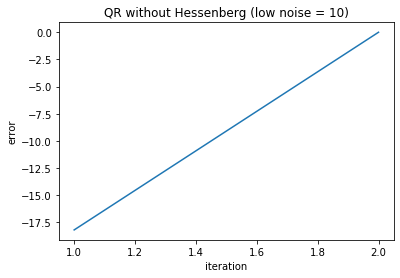

Error = (-6.545608499664013e-10+0j) after 2 iterations
QR solution: [(4.6362208080776774+0j), (1.9529372574594412+2.954276537227318j), (1.9529372574594412-2.954276537227318j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [54]:
shift = 'shift'
exp_name = 'Low noise'
error = 1e-3
e_vals = qr(qr_noise3, error=error, callback = monitor_error, shift=True)

show_graph(f'QR without Hessenberg (low noise = 10)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

NoHess_results[exp_name]['err'][shift] = history["err"][-1].real
NoHess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

##### Second, the medium noise is applied. The result shows that the algorithm converges but the found eigenvalues are not that good. 

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


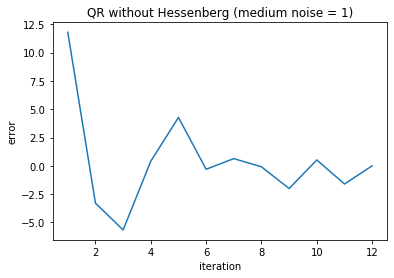

Error = (-0.000612449987407615+0j) after 12 iterations
QR solution: [(6.996151409180125+0j), (0.39311692931466347+0j), (2.7806995154685015+0j), (0.9600601998312484+0j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [55]:
shift = 'no shift'
exp_name = 'Med noise'
error = 1e-3
e_vals = qr(qr_noise1, error=error, callback = monitor_error)

show_graph(f'QR without Hessenberg (medium noise = 1)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

NoHess_results[exp_name]['err'][shift] = history["err"][-1].real
NoHess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alsh

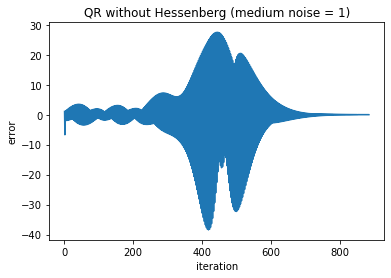

Error = (-0.0006889036432333739+0j) after 885 iterations
QR solution: [(0.6733610820465399+3.737223957288207j), (0.6733610820465399-3.737223957288207j), (6.997195421732787+0j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [56]:
shift = 'shift'
exp_name = 'Med noise'
error = 1e-3
e_vals = qr(qr_noise1, error=error, callback = monitor_error, shift=True)

show_graph(f'QR without Hessenberg (medium noise = 1)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

NoHess_results[exp_name]['err'][shift] = history["err"][-1].real
NoHess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

##### Third, the high noise is applied. Here the peaks are more frequent in the convergence graph.

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alsh

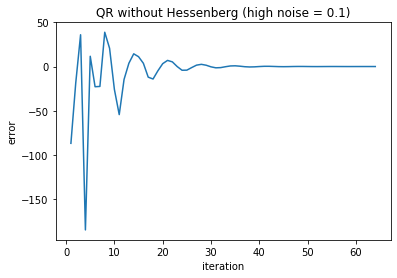

Error = (-0.000848530701745176+0j) after 64 iterations
QR solution: [(10.24969217198735+13.505427769123656j), (10.24969217198735-13.505427769123656j), (14.433345077683965+0j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [57]:
shift = 'no shift'
exp_name = 'High noise'
error = 1e-3
e_vals = qr(qr_noise2, error=error, callback = monitor_error)

show_graph(f'QR without Hessenberg (high noise = 0.1)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

NoHess_results[exp_name]['err'][shift] = history["err"][-1].real
NoHess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


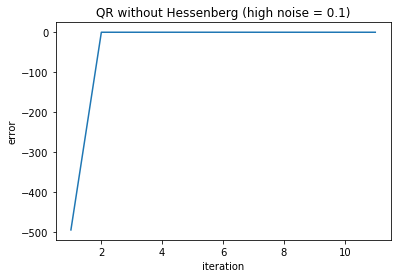

Error = (-0.000732905529304162+0j) after 11 iterations
QR solution: [(10.249798093748979+13.50558254627765j), (10.249798093748979-13.50558254627765j), (14.433133234160772+0j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [58]:
shift = 'shift'
exp_name = 'High noise'
error = 1e-3
e_vals = qr(qr_noise2, error=error, callback = monitor_error, shift=True)

show_graph(f'QR without Hessenberg (high noise = 0.1)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

NoHess_results[exp_name]['err'][shift] = history["err"][-1].real
NoHess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

##### Also, the huge noise is applied, but now without error limit for $50$ and $500$ iterations, and it shows either convergence to wrong eigenvalues or no convergence at all.

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alsh

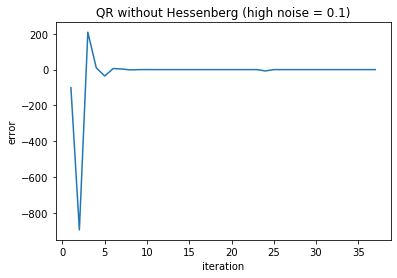

Error = (2.2737367544323206e-13+0j) after 37 iterations
QR solution: [(-6.649064829526163+19.750386674308015j), (-6.649064829526163-19.750386674308015j), (7.729862367044861+0j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [59]:
# error = 1e-3
qr_mtx = np.copy(mat)
qr_noise2 = qr_mtx + noise(0.1) # huge noise
iter_num=50
error = 1e-12
e_vals = qr(qr_noise2, iter_num=iter_num, error=error, callback = monitor_error)

show_graph(f'QR without Hessenberg (high noise = 0.1)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')
clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alsh

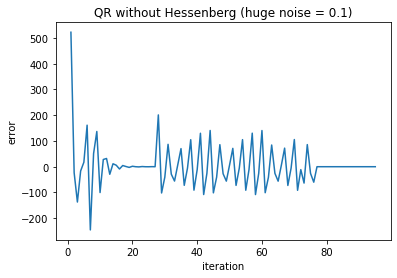

Error = (-4.547473508864641e-13+0j) after 95 iterations
QR solution: [(-31.338016319984888+0j), (-12.717949680740942+0j), (4.86599957799139+7.279664821723192j), (4.86599957799139-7.279664821723192j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [60]:
# error = 1e-3
qr_mtx = np.copy(mat)
qr_noise2 = qr_mtx + noise(0.1) # huge noise
iter_num=500
error = 1e-12
e_vals = qr(qr_noise2, iter_num=iter_num, error=error, callback = monitor_error)

show_graph(f'QR without Hessenberg (huge noise = 0.1)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')
clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

## Transformation to Hessenberg matrix - Implementation

The shape of the Hessenberg matrix remains invariant for the QR transformation. Therefore after a QR transformation the resulting matrix is also in Hessenberg form.

Instead of working with **A**, it is transformed into **Hessenberg** form (close to upper triangualar form) where the eignevalues remain the same, in order to reduce the complixity from **O($n^3$)** ( O($n^2$) rotation and O($n$) multiplication) into **O($n^2$)**. <br>
$A \rightarrow F = Z^{-1} A Z$ <br>
where $Z$ is a lower triangular matrix and $F$ is the in Hessenberg form: <br>
$$\begin{pmatrix}   f_{11} & f_{21} & . & . & . &   & f_{1n}  \\
                    1 & f_{22} & . & . & . &   & f_{2n}  \\
                    0 &   &  1 &  &   &   & . \\
                    . &   &    & . &   &   & . \\
                    . &   &   &   & . &   &   \\
                    &   &   &   &   &   &   \\
                    0 & 0 & . & . &   & 1 & f_{nn}  \\
\end{pmatrix}$$
<br>
<br>
shifting is used to speed up the convergence, in other words, instead of working with $F_k$ it is shifted by a scalar. <br>
The slow convergence might be caused when two values are close to each other (uisng Hessenberg). <br>
_we need $\lambda_i << \lambda_{i-1}  \rightarrow \left|\frac{\lambda_i}{\lambda_{i-1}}\right| < 1$ <br>
$k \rightarrow \infty \longmapsto {(\frac{\lambda_i}{\lambda_{i-1}})}^{k} \rightarrow 0$_ <br>
so, what we do is to $\frac{\lambda_i}{\lambda_{i-1}} \longmapsto \frac{\lambda_i - s_k}{\lambda_{i-1} - s_k}$, where $s_k$ is the shifting scalar.

In order to get eigenvectors for **A**, we find **F** eigenvectors first, by solving: <br>
$(\lambda - I - F) y = 0$, where $y$ is the eigenvector with $\lambda$ eigenvalue. <br>
In general: <br>
$y_i = \lambda y_{i+1} - \sum_{i=j+1}^{n} f_{j+1, i} . y_i$ <br>
then, **A** eigenvector is $Z.y$ <br>
because: <br>
$F.y = \lambda y$  and $A.Z = Z.F$<br>
then, <br>
$A.(Z.y) = \lambda .(Z.y)$<br>

In [61]:
def transform_Hessenberg(mtx):
    A = np.copy(mtx)
    # init F
    F = np.zeros(A.shape) 
    for idx in range(1, A.shape[0]):
        F[idx, idx - 1] = 1.0
    Z = np.zeros(A.shape)
    Z[0, 0] = 1.0
    for k in range(1, A.shape[1] + 1):
        Azk = np.matmul(A, Z[:, k - 1])
        for i in range(0, k):
            temp = 0.0
            for j in range(0, i):
                temp += F[j, k - 1] * Z[i, j]
            F[i, k - 1] = (Azk[i] - temp) / Z[i, i]
        
        if k < A.shape[1]: # to get the last row of F, but here Z[:, k] would be out of range
            Z[:, k] = Azk[:]
            for t in range(0, k):
                Z[:, k] -= F[t, k - 1] * Z[:, t]

    return F, Z

## Experiments with the given matrix (Hessenberg)

Similarly, the following subtasks will be investigated: <br>
QR iteration with Hessenberg (convergence speed, eigenvalues)
1. unbounded iteration, error tolerence of $10^{-2}$
2. unbounded iteration, error tolerence of $10^{-3}$
3. unbounded error, $50$ iterations
4. unbounded error, $200$ iterations
5. applying noise ($100$ iterations)

### Eigen values by Numpy package

In [62]:
qr_mtx = np.copy(mat)
ref_solution = np.linalg.eig(qr_mtx)[0]
print("Reference solution:")
for E in ref_solution:
    print(E)

Reference solution:
(4.2097461532535965+8.881784197001252e-16j)
(2.036130104533675+2.786496827896783j)
(0.7179936376790566-3.718886770256047e-17j)
(2.0361301045336764-2.7864968278967845j)


### Data dictionary

In [63]:
main_exps = ["E = 1e-2", "E = 1e-3", "It 50", "It 200", "High noise", "Med noise", "Low noise"]
sub_exps = ["err", "it"]
Hess_results = dict()
for main_exp in main_exps:
    Hess_results[main_exp] = {}
    for sub_exp in sub_exps:
        Hess_results[main_exp].update({sub_exp: {}})
print(Hess_results)

{'E = 1e-2': {'err': {}, 'it': {}}, 'E = 1e-3': {'err': {}, 'it': {}}, 'It 50': {'err': {}, 'it': {}}, 'It 200': {'err': {}, 'it': {}}, 'High noise': {'err': {}, 'it': {}}, 'Med noise': {'err': {}, 'it': {}}, 'Low noise': {'err': {}, 'it': {}}}


In [64]:
# Functions which will be used in the following tasks

history = { "it": [], "err": []}
def monitor_error(error):
    history["err"].append(error)
    history["it"].append(len(history["it"]) + 1)
    
def show_graph(title):
    plt.plot(history["it"], history["err"])

    plt.xlabel('iteration')
    plt.ylabel('error')
    plt.title(title)
    plt.show()

def clear_history():
    history["it"].clear()
    history["err"].clear()

#### QR with Hessenberg (error = $10^{-2}$)

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


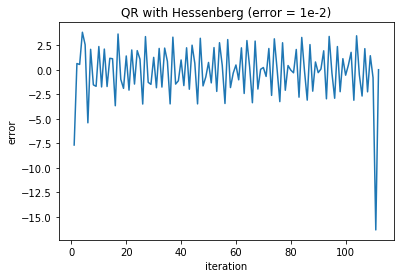

Error = (3.580176155537629e-10+0j) after 112 iterations
QR solution: [(4.209746153239611+0j), (2.036130104540688+2.7864968279799016j), (2.036130104540688-2.7864968279799016j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [65]:
shift = 'no shift'
exp_name = 'E = 1e-2'
qr_mtx = np.copy(mat)
qr_f, _ = transform_Hessenberg(qr_mtx)

error = 1e-2
e_vals = qr(qr_f, error=error, callback = monitor_error)

show_graph("QR with Hessenberg (error = 1e-2)")
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

Hess_results[exp_name]['err'][shift] = history["err"][-1].real
Hess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


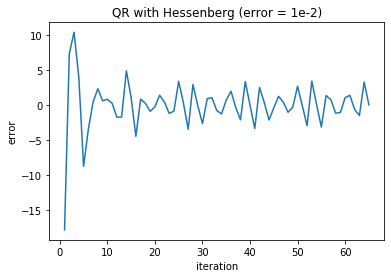

Error = (-0.00249482558241354+0j) after 65 iterations
QR solution: [4.2108451235566, 3.3458087892055426, (0.7253524495587936+0j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [66]:
shift = 'shift'
exp_name = 'E = 1e-2'
qr_mtx = np.copy(mat)
qr_f, _ = transform_Hessenberg(qr_mtx)

error = 1e-2
e_vals = qr(qr_f, error=error, callback = monitor_error, shift=True)

show_graph("QR with Hessenberg (error = 1e-2)")
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

Hess_results[exp_name]['err'][shift] = history["err"][-1].real
Hess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

#### QR with Hessenberg (error = $10^{-3}$)

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


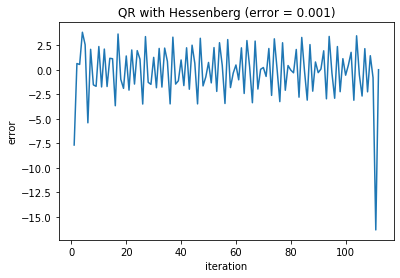

Error = (3.580176155537629e-10+0j) after 112 iterations
QR solution: [(4.209746153239611+0j), (2.036130104540688+2.7864968279799016j), (2.036130104540688-2.7864968279799016j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [67]:
shift = 'no shift'
exp_name = 'E = 1e-3'
qr_mtx = np.copy(mat)
qr_f, _ = transform_Hessenberg(qr_mtx)

error = 1e-3
e_vals = qr(qr_f, error=error, callback = monitor_error)

show_graph(f'QR with Hessenberg (error = {error})')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

Hess_results[exp_name]['err'][shift] = history["err"][-1].real
Hess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


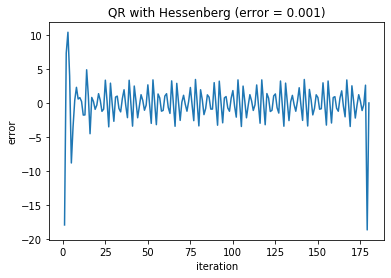

Error = (-1.2169074636858568e-09+0j) after 180 iterations
QR solution: [(4.209746153127622+0j), (2.0361301045966744+2.7864968278284854j), (2.0361301045966744-2.7864968278284854j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [68]:
shift = 'shift'
exp_name = 'E = 1e-3'
qr_mtx = np.copy(mat)
qr_f, _ = transform_Hessenberg(qr_mtx)

error = 1e-3
e_vals = qr(qr_f, error=error, callback = monitor_error, shift=True)

show_graph(f'QR with Hessenberg (error = {error})')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

Hess_results[exp_name]['err'][shift] = history["err"][-1].real
Hess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

#### QR with Hessenberg (iterations = $50$)

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


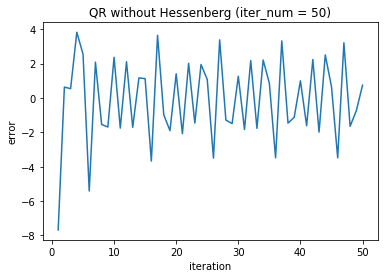

Error = (0.7409557733110148+0j) after 50 iterations
QR solution: [4.209727864919414, 1.147032287718, (2.925246209683544+0j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [69]:
shift = 'no shift'
exp_name = 'It 50'
qr_mtx = np.copy(mat)
qr_f, _ = transform_Hessenberg(qr_mtx)

iter_num = 50
e_vals = qr(qr_f, iter_num=iter_num, callback = monitor_error)

show_graph(f'QR without Hessenberg (iter_num = {iter_num})')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

Hess_results[exp_name]['err'][shift] = history["err"][-1].real
Hess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


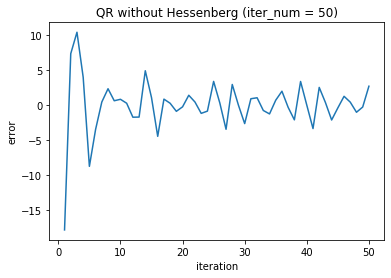

Error = (2.6606059102445165+0j) after 50 iterations
QR solution: [4.210375002601579, 0.7861947376280012, (3.2854366220913467+0j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [70]:
shift = 'shift'
exp_name = 'It 50'
qr_mtx = np.copy(mat)
qr_f, _ = transform_Hessenberg(qr_mtx)

iter_num = 50
e_vals = qr(qr_f, iter_num=iter_num, callback = monitor_error, shift=True)

show_graph(f'QR without Hessenberg (iter_num = {iter_num})')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

Hess_results[exp_name]['err'][shift] = history["err"][-1].real
Hess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

#### QR with Hessenberg (iterations = $200$)

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


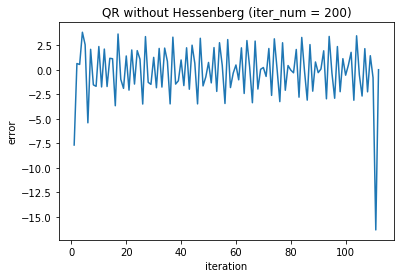

Error = (3.580176155537629e-10+0j) after 112 iterations
QR solution: [(4.209746153239611+0j), (2.036130104540688+2.7864968279799016j), (2.036130104540688-2.7864968279799016j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [71]:
shift = 'no shift'
exp_name = 'It 200'
qr_mtx = np.copy(mat)
qr_f, _ =transform_Hessenberg(qr_mtx)

iter_num = 200
e_vals = qr(qr_f, iter_num=iter_num, callback = monitor_error)

show_graph(f'QR without Hessenberg (iter_num = {iter_num})')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

Hess_results[exp_name]['err'][shift] = history["err"][-1].real
Hess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


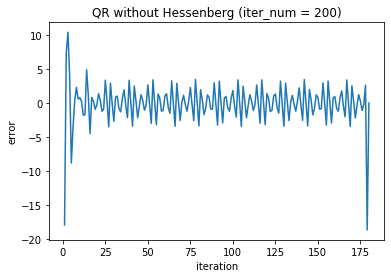

Error = (-1.2169074636858568e-09+0j) after 180 iterations
QR solution: [(4.209746153127622+0j), (2.0361301045966744+2.7864968278284854j), (2.0361301045966744-2.7864968278284854j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [72]:
shift = 'shift'
exp_name = 'It 200'
qr_mtx = np.copy(mat)
qr_f, _ =transform_Hessenberg(qr_mtx)

iter_num = 200
e_vals = qr(qr_f, iter_num=iter_num, callback = monitor_error, shift=True)

show_graph(f'QR without Hessenberg (iter_num = {iter_num})')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

Hess_results[exp_name]['err'][shift] = history["err"][-1].real
Hess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

#### Applying noise

In [73]:
np.random.seed(14)
def noise(sigma): # standard normal distribution in the background
    return np.random.randn(4, 4)/sigma

# examples
qr_mtx = np.copy(mat)
qr_noise1 = qr_mtx + noise(1) # medium noise
qr_noise2 = qr_mtx + noise(0.1) # huge noise
qr_noise3 = qr_mtx + noise(10) # small noise

print("Original: \n", qr_mtx)
print("Noise 1: \n", qr_noise1)
print("Noise 2: \n", qr_noise2)
print("Noise 3: \n", qr_noise3)

Original: 
 [[ 5.+0.j -2.+0.j -5.+0.j -1.+0.j]
 [ 1.+0.j  0.+0.j -3.+0.j -2.+0.j]
 [ 0.+0.j  2.+0.j  2.+0.j -3.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  2.+0.j]]
Noise 1: 
 [[ 6.55133911+0.j -1.92081398+0.j -4.82602347+0.j -1.07233657+0.j]
 [-1.0043294 +0.j  0.14467781+0.j -4.50116862+0.j -1.78889055+0.j]
 [-0.55820506+0.j  3.08452906+0.j  1.81371088+0.j -2.98533863+0.j]
 [-1.07556947+0.j  0.64225207+0.j  0.81966329+0.j  2.62030025+0.j]]
Noise 2: 
 [[ 13.10974335+0.j   5.77935866+0.j  -7.37489678+0.j -19.91912345+0.j]
 [-10.72121794+0.j   8.36206971+0.j   7.092734  +0.j  10.93099361+0.j]
 [ -5.49331166+0.j  -7.81712865+0.j  11.14672758+0.j   5.73070378+0.j]
 [  0.22111142+0.j  -0.04143584+0.j -12.49126151+0.j  -0.08217846+0.j]]
Noise 3: 
 [[ 5.13265403+0.j -2.09162606+0.j -5.04700131+0.j -1.01494425+0.j]
 [ 0.96747399+0.j -0.18057235+0.j -3.05003702+0.j -2.05647806+0.j]
 [-0.03144286+0.j  1.96033228+0.j  2.00059331+0.j -3.09971382+0.j]
 [ 0.16910976+0.j -0.03164409+0.j  1.14651344+0.j  2.146360

##### First, low noise is applied. Results are similar like in the reference case.

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


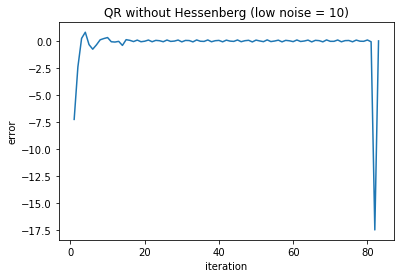

Error = (4.762057415064191e-10+0j) after 83 iterations
QR solution: [(4.6362208082316245+0j), (1.9529372573824575+2.954276537209516j), (1.9529372573824575-2.954276537209516j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [74]:
shift = 'no shift'
exp_name = 'Low noise'
qr_mtx = np.copy(qr_noise3)
qr_f, _ =transform_Hessenberg(qr_mtx)

error = 1e-3
e_vals = qr(qr_f, error=error, callback = monitor_error)

show_graph(f'QR without Hessenberg (low noise = 10)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

Hess_results[exp_name]['err'][shift] = history["err"][-1].real
Hess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


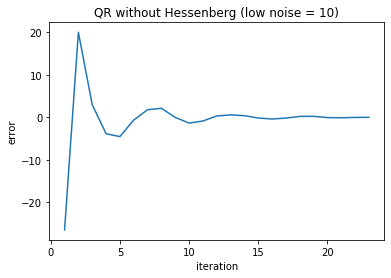

Error = (0.0004185802711340614+0j) after 23 iterations
QR solution: [4.625674982985844, 1.770518173723841, (2.1459021662868296+0j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [75]:
shift = 'shift'
exp_name = 'Low noise'
qr_mtx = np.copy(qr_noise3)
qr_f, _ =transform_Hessenberg(qr_mtx)

error = 1e-3
e_vals = qr(qr_f, error=error, callback = monitor_error, shift=True)

show_graph(f'QR without Hessenberg (low noise = 10)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

Hess_results[exp_name]['err'][shift] = history["err"][-1].real
Hess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

##### Second, the medium noise is applied. The result shows that the algorithm converges but the found eigenvalues are not that good. 

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


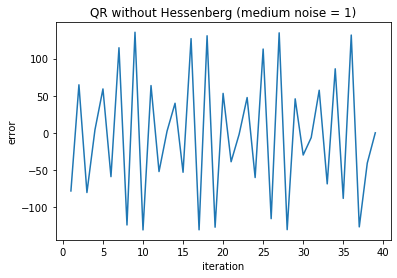

Error = (5.0212693111006956e-05+0j) after 39 iterations
QR solution: [(6.996379701915972+0j), (0.6737681997713381+3.7369754607811174j), (0.6737681997713381-3.7369754607811174j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [76]:
shift = 'no shift'
exp_name = 'Med noise'
qr_mtx = np.copy(qr_noise1)
qr_f, _ = transform_Hessenberg(qr_mtx)

error = 1e-3
e_vals = qr(qr_f, error=error, callback = monitor_error)

show_graph(f'QR without Hessenberg (medium noise = 1)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

Hess_results[exp_name]['err'][shift] = history["err"][-1].real
Hess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


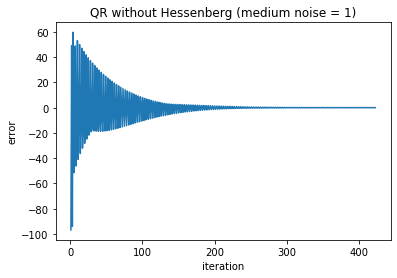

Error = (0.0006246974180861287+0j) after 422 iterations
QR solution: [(0.6741250856325247+3.736774163264782j), (0.6741250856325247-3.736774163264782j), (6.9956674145611855+0j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [77]:
shift = 'shift'
exp_name = 'Med noise'
qr_mtx = np.copy(qr_noise1)
qr_f, _ = transform_Hessenberg(qr_mtx)

error = 1e-3
e_vals = qr(qr_f, error=error, callback = monitor_error, shift = True)

show_graph(f'QR without Hessenberg (medium noise = 1)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

Hess_results[exp_name]['err'][shift] = history["err"][-1].real
Hess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

##### Third, the high noise is applied. Here the peaks are more frequent in the convergence graph.

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


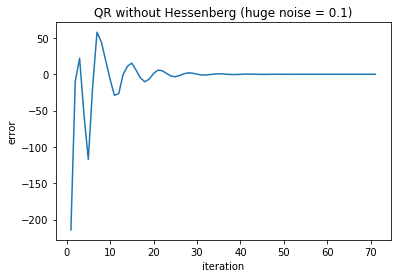

Error = (3.7492970079711085e-06+0j) after 71 iterations
QR solution: [(10.249763292512405+13.505504352913897j), (10.249763292512405-13.505504352913897j), (14.43320283663385+0j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [78]:
shift = 'no shift'
exp_name = 'High noise'
qr_mtx = np.copy(qr_noise2)
qr_f, _ =transform_Hessenberg(qr_mtx)

error = 1e-3
e_vals = qr(qr_f, error=error, callback = monitor_error)

show_graph(f'QR without Hessenberg (huge noise = 0.1)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

Hess_results[exp_name]['err'][shift] = history["err"][-1].real
Hess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


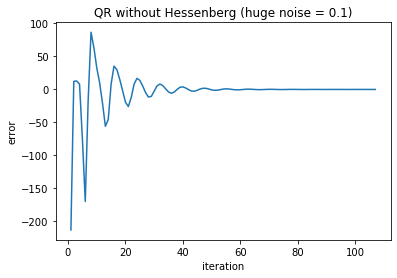

Error = (-0.0005294832145352757+0j) after 107 iterations
QR solution: [(10.249856543483581+13.505660272366425j), (10.249856543483581-13.505660272366425j), (14.433016334691626+0j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [79]:
shift = 'shift'
exp_name = 'High noise'
qr_mtx = np.copy(qr_noise2)
qr_f, _ =transform_Hessenberg(qr_mtx)

error = 1e-3
e_vals = qr(qr_f, error=error, callback = monitor_error, shift=True)

show_graph(f'QR without Hessenberg (huge noise = 0.1)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

Hess_results[exp_name]['err'][shift] = history["err"][-1].real
Hess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

##### Also, the huge noise is applied, but now without error limit for $50$ and $500$ iterations, and it shows either convergence to wrong eigenvalues or no convergence at all.

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


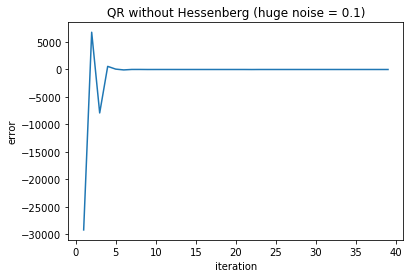

Error = (-9.094947017729282e-13+0j) after 39 iterations
QR solution: [(-6.649064829526198+19.75038667430806j), (-6.649064829526198-19.75038667430806j), (7.729862367044882+0j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [80]:
# error = 1e-3
qr_mtx = np.copy(mat)
qr_noise2 = qr_mtx + noise(0.1) # huge noise

qr_mtx = np.copy(qr_noise2)
qr_f, _ =transform_Hessenberg(qr_mtx)

iter_num=50
error = 1e-12
e_vals = qr(qr_f, iter_num=iter_num, error=error, callback = monitor_error)

show_graph(f'QR without Hessenberg (huge noise = 0.1)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')
clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


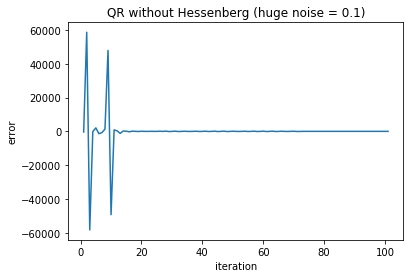

Error = (6.821210263296962e-13+0j) after 101 iterations
QR solution: [(-31.33801631998478+0j), (-12.71794968074079+0j), (4.865999577991332+7.279664821723271j), (4.865999577991332-7.279664821723271j)]
Reference solution: [4.20974615+8.88178420e-16j 2.0361301 +2.78649683e+00j
 0.71799364-3.71888677e-17j 2.0361301 -2.78649683e+00j]


In [81]:
# error = 1e-3
qr_mtx = np.copy(mat)
qr_noise2 = qr_mtx + noise(0.1) # huge noise

qr_mtx = np.copy(qr_noise2)
qr_f, _ = transform_Hessenberg(qr_mtx)

iter_num=500
error = 1e-12
e_vals = qr(qr_f, iter_num=iter_num, error=error, callback = monitor_error)

show_graph(f'QR without Hessenberg (huge noise = 0.1)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')
clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

In [82]:
Hess_results

{'E = 1e-2': {'err': {'no shift': 3.580176155537629e-10,
   'shift': -0.00249482558241354},
  'it': {'no shift': 112, 'shift': 65}},
 'E = 1e-3': {'err': {'no shift': 3.580176155537629e-10,
   'shift': -1.2169074636858568e-09},
  'it': {'no shift': 112, 'shift': 180}},
 'It 50': {'err': {'no shift': 0.7409557733110148,
   'shift': 2.6606059102445165},
  'it': {'no shift': 50, 'shift': 50}},
 'It 200': {'err': {'no shift': 3.580176155537629e-10,
   'shift': -1.2169074636858568e-09},
  'it': {'no shift': 112, 'shift': 180}},
 'High noise': {'err': {'no shift': 3.7492970079711085e-06,
   'shift': -0.0005294832145352757},
  'it': {'no shift': 71, 'shift': 107}},
 'Med noise': {'err': {'no shift': 5.0212693111006956e-05,
   'shift': 0.0006246974180861287},
  'it': {'no shift': 39, 'shift': 422}},
 'Low noise': {'err': {'no shift': 4.762057415064191e-10,
   'shift': 0.0004185802711340614},
  'it': {'no shift': 83, 'shift': 23}}}

In [83]:
NoHess_results

{'E = 1e-2': {'err': {'no shift': 6.921574424723076e-10,
   'shift': -0.00033878722587843413},
  'it': {'no shift': 114, 'shift': 16}},
 'E = 1e-3': {'err': {'no shift': 6.921574424723076e-10,
   'shift': -0.00033878722587843413},
  'it': {'no shift': 114, 'shift': 16}},
 'It 50': {'err': {'no shift': -0.43618855988157534,
   'shift': -0.45290442155897637},
  'it': {'no shift': 50, 'shift': 50}},
 'It 200': {'err': {'no shift': 6.921574424723076e-10,
   'shift': 6.563567467310349e-10},
  'it': {'no shift': 114, 'shift': 184}},
 'High noise': {'err': {'no shift': -0.000848530701745176,
   'shift': -0.000732905529304162},
  'it': {'no shift': 64, 'shift': 11}},
 'Med noise': {'err': {'no shift': -0.000612449987407615,
   'shift': -0.0006889036432333739},
  'it': {'no shift': 12, 'shift': 885}},
 'Low noise': {'err': {'no shift': 4.797104935505558e-10,
   'shift': -6.545608499664013e-10},
  'it': {'no shift': 83, 'shift': 2}}}

In [84]:
print("Without Hessenberg Results")
df = pd.DataFrame.from_dict({(i,j): NoHess_results[i][j] 
                           for i in NoHess_results.keys() 
                           for j in NoHess_results[i].keys()},
                       orient='index')
df

Without Hessenberg Results


no shift         shift
E = 1e-2   err  6.921574e-10 -3.387872e-04
           it   1.140000e+02  1.600000e+01
E = 1e-3   err  6.921574e-10 -3.387872e-04
           it   1.140000e+02  1.600000e+01
It 50      err -4.361886e-01 -4.529044e-01
           it   5.000000e+01  5.000000e+01
It 200     err  6.921574e-10  6.563567e-10
           it   1.140000e+02  1.840000e+02
High noise err -8.485307e-04 -7.329055e-04
           it   6.400000e+01  1.100000e+01
Med noise  err -6.124500e-04 -6.889036e-04
           it   1.200000e+01  8.850000e+02
Low noise  err  4.797105e-10 -6.545608e-10
           it   8.300000e+01  2.000000e+00

In [85]:
print("With Hessenberg Results")
df = pd.DataFrame.from_dict({(i,j): Hess_results[i][j] 
                           for i in Hess_results.keys() 
                           for j in Hess_results[i].keys()},
                       orient='index')
df

With Hessenberg Results


no shift         shift
E = 1e-2   err  3.580176e-10 -2.494826e-03
           it   1.120000e+02  6.500000e+01
E = 1e-3   err  3.580176e-10 -1.216907e-09
           it   1.120000e+02  1.800000e+02
It 50      err  7.409558e-01  2.660606e+00
           it   5.000000e+01  5.000000e+01
It 200     err  3.580176e-10 -1.216907e-09
           it   1.120000e+02  1.800000e+02
High noise err  3.749297e-06 -5.294832e-04
           it   7.100000e+01  1.070000e+02
Med noise  err  5.021269e-05  6.246974e-04
           it   3.900000e+01  4.220000e+02
Low noise  err  4.762057e-10  4.185803e-04
           it   8.300000e+01  2.300000e+01

## Conclusion

* For this specific example the implemented algorith was able to find the eigenvalues.
* If the transformation to Hessenberg-form was applied the convergence time was not affected. But it made curves less noisy.
* Shifting has not shown the expected effect. Instead it slightly made slower the convergence in most cases.
* High noise cause fluctuating convergence curves and un patterned behaviour, regardless of the version which is used with it.

## Reference

* Rózsa Pál, Lineáris algebra és alkalmazásai, 3. kiadás, 1991
* https://github.com/adamtiger/ai/tree/code
* https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.eig.html (the refernce calculation of the eigenvalues was based on the numpy library corresponding function)